## Confusion Matrix

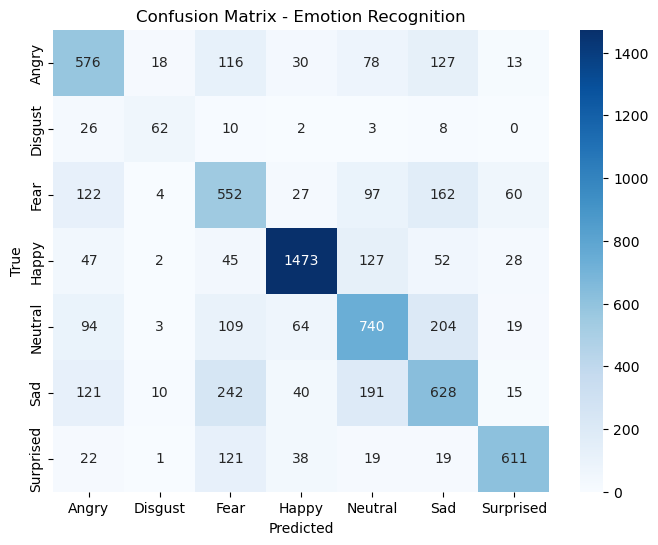


Classification Report:

              precision    recall  f1-score   support

       Angry       0.57      0.60      0.59       958
     Disgust       0.62      0.56      0.59       111
        Fear       0.46      0.54      0.50      1024
       Happy       0.88      0.83      0.85      1774
     Neutral       0.59      0.60      0.59      1233
         Sad       0.52      0.50      0.51      1247
   Surprised       0.82      0.74      0.77       831

    accuracy                           0.65      7178
   macro avg       0.64      0.62      0.63      7178
weighted avg       0.66      0.65      0.65      7178



In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# --- Config ---
data_dir = r"C:\Users\HWA\Desktop\Face-Emotion-Recognition-main\Face-Emotion-Recognition-main\test"
batch_size = 32
num_classes = 7
save_path = "Final_ModelV2.pth"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Transform (must match training preprocessing) ---
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# --- Load dataset ---
test_dataset = datasets.ImageFolder(root=data_dir, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- Model ---
model = models.resnet18(weights=None)  # same as training
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load(save_path, map_location=device))
model = model.to(device)
model.eval()

# --- Emotion labels ---
emotions = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Neutral", 5:"Sad", 6:"Surprised"}

# --- Collect predictions ---
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# --- Confusion Matrix ---
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[emotions[i] for i in range(num_classes)],
            yticklabels=[emotions[i] for i in range(num_classes)])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Emotion Recognition")
plt.show()

# --- Classification Report ---
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=[emotions[i] for i in range(num_classes)]))
